# Feature Engineering: Overview

In data driven algorithms, we have an inherent schism with respect to the data to give to the algorithm. We'd like to give it as much and as rich information as possible, with respect to samples and features. However, the greedy nature of the tuning gets us to a spot where algorithms can almost take uninformative data and fit them to predict the target.

Adding uninformative features to the learning dataset can affect the generalizability of the learned models. Similarly, features may carry similar information. These lead to problems like multicollinearity, which is a hinderance for algorithms like Random forests. Non-informative features also increase the time to train the model. At some juncture, one would also like to consider the Signal-To-Noise ratios for features (cf Nate Silver 2012).

In the era of end to end deep learning, these problems may seem not as critical. However, these neccissitate more complex models, leading to lesser insight and intuition from the model. From a physics based perspective, we need models that give answers as well as insight.

Feature engineering is the field where we try to cull the most descriptive and discriminative features to use as inputs for our models. It includes feature selection where you choose the best features out of a set. Feature engineering where you may use linear or non-linear transforms to engineer better features. It also includes feature importances, where you try to determine the inputs that made your model give a specific answer.  

### Feature Selection

The first approach is using information based measures. Researchers often use the pearson's coefficient to ascertain the relationship or correlation between 2 variables. However, this is only a measure for LINEAR relationships. 

In [1]:
import numpy as np
from minepy import MINE
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
x = np.linspace(-1, 1, 1000)
noise_scale=0.1
ylinear=3.0*x+2.0+noise_scale*np.random.uniform(-1, 1, x.shape[0])
yquadratic=3.0*x*x+2.0+noise_scale*np.random.uniform(-1, 1, x.shape[0])
ytranscendental = np.sin( 2*np.pi * x) + noise_scale*x+np.random.uniform(-1, 1, x.shape[0])

In [54]:
rho1=np.corrcoef(x,ylinear)[0,1]
rho2=np.corrcoef(x,yquadratic)[0,1]
rho3=np.corrcoef(x,ytranscendental)[0,1]
print rho1,rho2,rho3

0.999427371334927 0.0038604851197719197 -0.22402480568439329


Text(0.5,1,'$\\rho$=-0.224025')

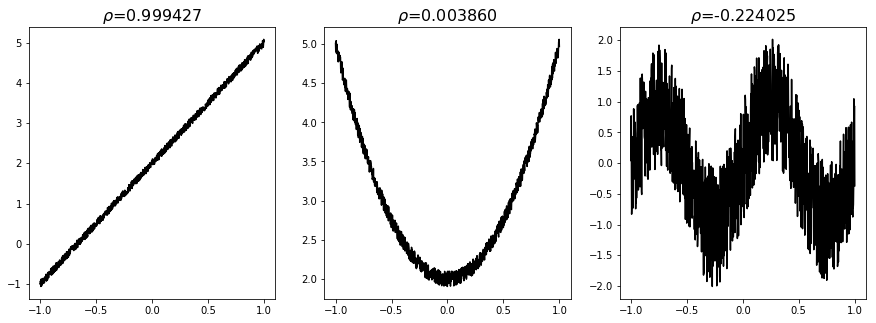

In [55]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))
axs[0].plot(x, ylinear,'k')
axs[0].set_title(r'$\rho$=%f'%rho1,fontsize=16)
axs[1].plot(x, yquadratic,'k')
axs[ 1].set_title(r'$\rho$=%f'%rho2,fontsize=16)
axs[2].plot(x, ytranscendental,'k')
axs[2].set_title(r'$\rho$=%f'%rho3,fontsize=16)

Inspite of a visibly clear and robust relationship between the variables, the pearson's coefficient is unable to ascertain non-linear relationships. The statistics community has developed measures in the last decade that are able to address this shortcoming, such as the Maximum Information Coefficient (MIC), the Distance Correlation, etc.

Here, we'll focus on the application of the MIC. Let's start with an illustration by extending our prior example.

In [67]:
mine = MINE(alpha=0.6, c=15, est="mic_approx")
mine.compute_score(x, ylinear)
MIC1=mine.mic()
mine.compute_score(x, yquadratic)
MIC2=mine.mic()
mine.compute_score(x, ytranscendental)
MIC3=mine.mic()

Text(0.5,1,'MIC=0.513111')

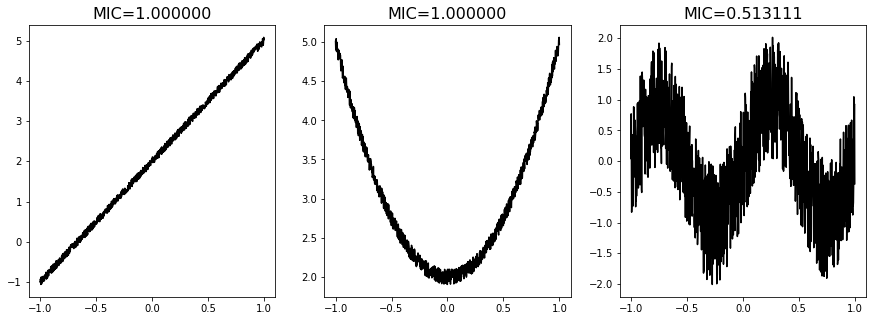

In [68]:
fig, axs = plt.subplots(1, 3c)
axs[0].plot(x, ylinear,'k')
axs[0].set_title(r'MIC=%f'%MIC1,fontsize=16)
axs[1].plot(x, yquadratic,'k')
axs[ 1].set_title(r'MIC=%f'%MIC2,fontsize=16)
axs[2].plot(x, ytranscendental,'k')
axs[2].set_title(r'MIC=%f'%MIC3,fontsize=16)

As we can see, the MIC is able to ascertain robust non-linear relationships. Ideally, we would wish that as the signal to noise ratio gets exacerbated, the value of the MIC decreases. The next illustration shows that this is indeed the case.

In [69]:
yq1=3.0*x*x+2.0+0.1*np.random.uniform(-1, 1, x.shape[0])
yq2=3.0*x*x+2.0+0.5*np.random.uniform(-1, 1, x.shape[0])
yq3=3.0*x*x+2.0+1*np.random.uniform(-1, 1, x.shape[0])

In [70]:
mine = MINE(alpha=0.6, c=15, est="mic_approx")
mine.compute_score(x, yq1)
MIC1=mine.mic()
mine.compute_score(x, yq2)
MIC2=mine.mic()
mine.compute_score(x, yq3)
MIC3=mine.mic()

Text(0.5,1,'MIC=0.583764')

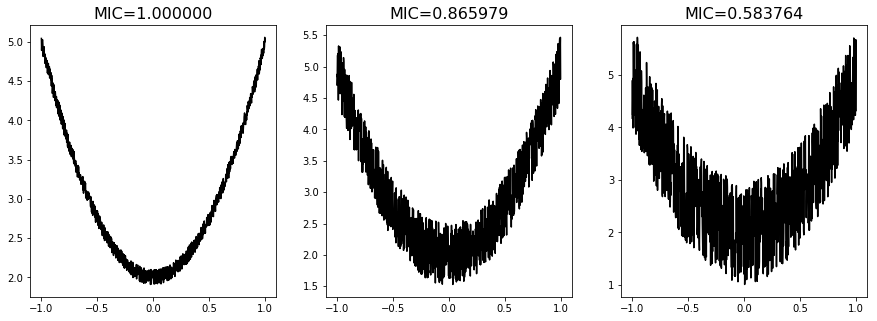

In [71]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))
axs[0].plot(x, yq1,'k')
axs[0].set_title(r'MIC=%f'%MIC1,fontsize=16)
axs[1].plot(x, yq2,'k')
axs[ 1].set_title(r'MIC=%f'%MIC2,fontsize=16)
axs[2].plot(x, yq3,'k')
axs[2].set_title(r'MIC=%f'%MIC3,fontsize=16)

The MIC belongs to the maximal information-based nonparametric exploration (MINE) class of statistics. We use the MINEPy library to access such information-based measures. As an illustration, we re-create this figure outlining linear correlations from Wikipedia. (https://en.wikipedia.org/wiki/Correlation_and_dependence)

![alt text](LinearCorrelation.png "Title")

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:56: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


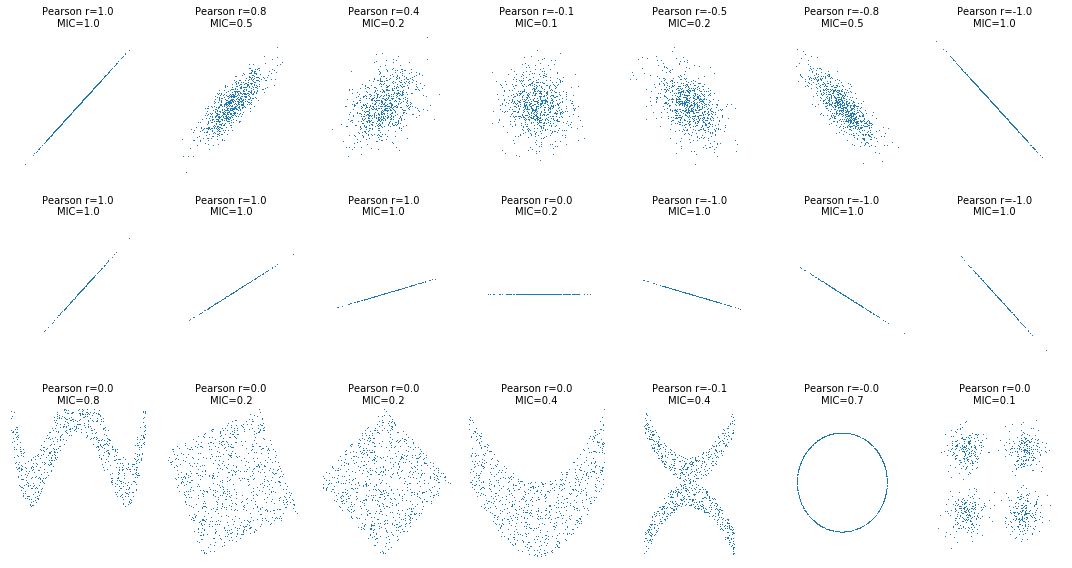

In [80]:
rs = np.random.RandomState(seed=0)

def mysubplot(x, y, numRows, numCols, plotNum,xlim=(-4, 4), ylim=(-4, 4)):

    r = np.around(np.corrcoef(x, y)[0, 1], 1)
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(x, y)
    mic = np.around(mine.mic(), 1)
    ax = plt.subplot(numRows, numCols, plotNum,xlim=xlim, ylim=ylim)
    ax.set_title('Pearson r=%.1f\nMIC=%.1f' % (r, mic),fontsize=10)
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.plot(x, y, ',')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

def rotation(xy, t):
    return np.dot(xy, [[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])

def mvnormal(n=1000):
    cors = [1.0, 0.8, 0.4, 0.0, -0.4, -0.8, -1.0]
    for i, cor in enumerate(cors):
        cov = [[1, cor],[cor, 1]]
        xy = rs.multivariate_normal([0, 0], cov, n)
        mysubplot(xy[:, 0], xy[:, 1], 3, 7, i+1)

def rotnormal(n=1000):
    ts = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/2-np.pi/6,
          np.pi/2-np.pi/12, np.pi/2]
    cov = [[1, 1],[1, 1]]
    xy = rs.multivariate_normal([0, 0], cov, n)
    for i, t in enumerate(ts):
        xy_r = rotation(xy, t)
        mysubplot(xy_r[:, 0], xy_r[:, 1], 3, 7, i+8)

def others(n=1000):
    x = rs.uniform(-1, 1, n)
    y = 4*(x**2-0.5)**2 + rs.uniform(-1, 1, n)/3
    mysubplot(x, y, 3, 7, 15, (-1, 1), (-1/3, 1+1/3))

    y = rs.uniform(-1, 1, n)
    xy = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2+np.sqrt(2)) / np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 16, (-lim, lim), (-lim, lim))

    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 17, (-lim, lim), (-lim, lim))

    y = 2*x**2 + rs.uniform(-1, 1, n)
    mysubplot(x, y, 3, 7, 18, (-1, 1), (-1, 3))

    y = (x**2 + rs.uniform(0, 0.5, n)) * \
        np.array([-1, 1])[rs.random_integers(0, 1, size=n)]
    mysubplot(x, y, 3, 7, 19, (-1.5, 1.5), (-1.5, 1.5))

    y = np.cos(x * np.pi) + rs.uniform(0, 1/8, n)
    x = np.sin(x * np.pi) + rs.uniform(0, 1/8, n)
    mysubplot(x, y, 3, 7, 20, (-1.5, 1.5), (-1.5, 1.5))

    xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
    xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
    xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
    xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
    xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 21, (-7, 7), (-7, 7))

plt.figure(facecolor='white',figsize=(15,8))
mvnormal(n=800)
rotnormal(n=200)
others(n=800)
plt.tight_layout()
plt.show()

### References 

1. Reshef, D.N., Reshef, Y.A., Finucane, H.K., Grossman, S.R., McVean, G., Turnbaugh, P.J., Lander, E.S., Mitzenmacher, M. and Sabeti, P.C., 2011. Detecting novel associations in large data sets. Science, 334(6062), pp.1518-1524.

2. Silver, N., 2012. The signal and the noise: the art and science of prediction. Penguin UK.